In [111]:
import genetic_script as gs
import seaborn as sns
import matplotlib.pyplot as plt
import math
import pandas as pd

In [138]:
def get_file_from_params(itrs, parents, best, cr, mr, wcov=1, wbal=1, wfair=1, wstr=1, wspr=1):
    result = "./test_results/" + str(itrs) + "_" + str(parents) + "_" + str(best) + "_" + str(cr) + "_" + str(mr) + "_" + str(wcov) + "_" + str(wbal) + "_" + str(wfair) + "_" + str(wstr) + "_" + str(wspr) + ".txt"
    return result


def get_time(filename):
    with open(filename, 'r') as f:
        return f.readlines()[-1]
    
def merge_dfs(df1, df2, name1="type1", name2="type2"):
    df1["type"] = [name1] * len(df1["iteration"])
    df2["type"] = [name2] * len(df2["iteration"])
    df_r = df1.append(df2, ignore_index=True)
    return df_r

def comparing_lineplots(dfs, names, compare_stat="best"):
    df_r = dfs[0]
    df_r["type"] = [names[0]] * len(df_r["iteration"]) 
    i = 1
    while i < len(dfs):
        df = dfs[i]
        df["type"] = [names[i]] * len(df["iteration"])
        df_r = df_r.append(df, ignore_index=True)
        i += 1
    
    plt.figure(figsize=(22,12))
    plt.margins(y=0.01)
    return sns.lineplot(x="iteration", y=compare_stat, hue="type", data=df_r)

def comparing_time(filenames, names):
    df = pd.DataFrame()
    times = []
    types = []
    i = 0
    while i < len(filenames):
        times.append(float(get_time(filenames[i])))
        types.append(names[i])
        i += 1
    df["time"] = times
    df["type"] = types
    g = sns.catplot(data=df, kind="bar", x="type", y="time")
    g.despine(left=True)
    return g

    

def get_best_values(dfs, compare_stat="best"):
    result = list()
    for df in dfs:
        result.append(min(df[compare_stat]))
    return result

In [148]:
itrs_te = 2000

parents_te1 = 100
parents_te2 = 200
parents_te3 = 300
best_te = 50
cr_te = 0.6
mr_te = 0.6

In [150]:
fn1 = get_file_from_params(itrs_te, parents_te1, int(parents_te1 * 0.5), cr_te, mr_te)
fn2 = get_file_from_params(itrs_te, parents_te2, int(parents_te2 * 0.5), cr_te, mr_te)
fn3 = get_file_from_params(itrs_te, parents_te3, int(parents_te3 * 0.5), cr_te, mr_te)

df1 = gs.parse_results(fn1)
df2 = gs.parse_results(fn2)
df3 = gs.parse_results(fn3)

fns = [fn1, fn2, fn3]
dfs = [df1, df2, df3]
names = ["100", "200", "300"]
df1

,iteration,best,coverage,balance,fairness,avg
0,1,991.833333,456.333333,436.000000,6.833333,1140.632917
1,2,962.708333,441.666667,418.333333,5.333333,1079.912917
2,3,946.041667,469.666667,375.666667,5.333333,1042.935000
3,4,908.791667,464.000000,352.333333,4.166667,1016.180417
4,5,852.125000,421.000000,325.666667,4.333333,989.210833
...,...,...,...,...,...,...
1996,1997,29.708333,1.333333,5.666667,1.333333,30.743333
1997,1998,29.708333,1.333333,5.666667,1.333333,30.713750
1998,1999,29.708333,1.333333,5.666667,1.333333,30.633750
1999,2000,29.708333,1.333333,5.666667,1.333333,30.715833


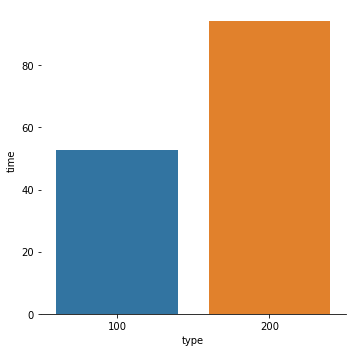

In [141]:
comparing_time(fns, names)

In [98]:
get_best_values(dfs, "avg")

[30.21875000000003, 29.576428571428576]

<AxesSubplot:xlabel='iteration', ylabel='best'>

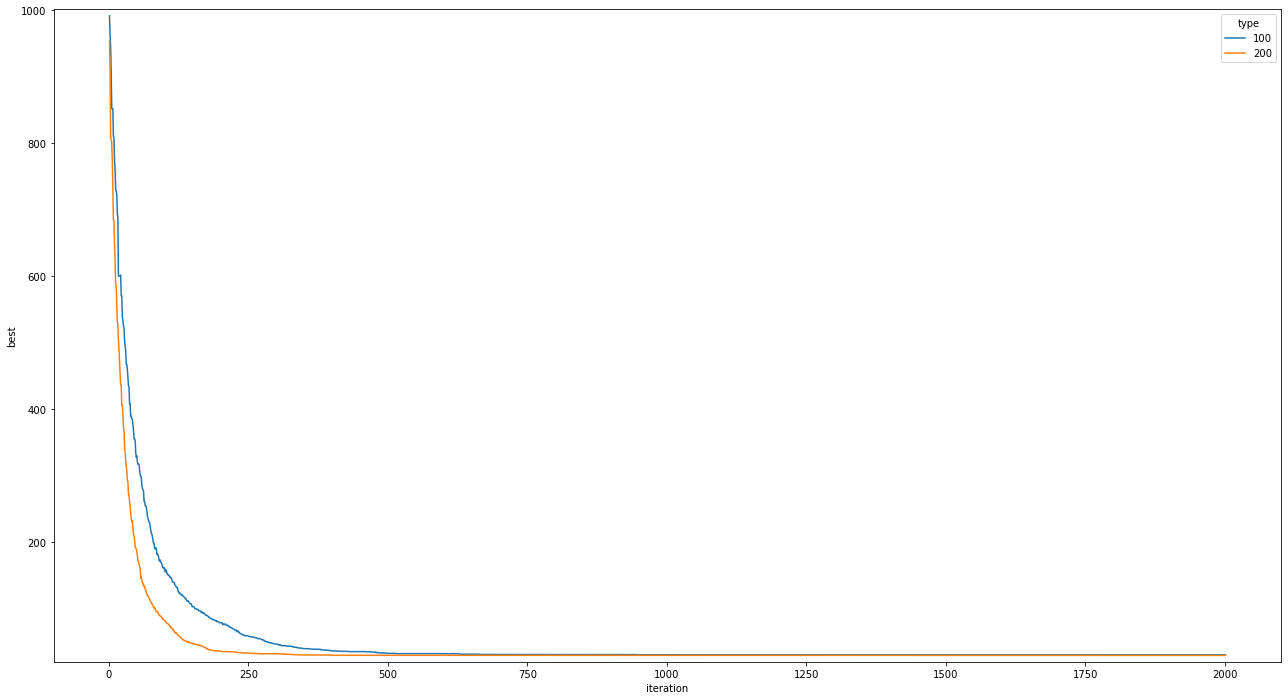

In [99]:
comparing_lineplots(dfs, names)

In [142]:
parents_te = 200
best_te1 = 20
best_te2 = 50
best_te3 = 100
best_te4 = 150
cr_te = 0.2
mr_te = 0.2

In [143]:
fn1 = get_file_from_params(itrs_te, parents_te, best_te1, cr_te, mr_te)
fn2 = get_file_from_params(itrs_te, parents_te, best_te2, cr_te, mr_te)
fn3 = get_file_from_params(itrs_te, parents_te, best_te3, cr_te, mr_te)
fn4 = get_file_from_params(itrs_te, parents_te, best_te4, cr_te, mr_te)

df1 = gs.parse_results(fn1)
df2 = gs.parse_results(fn2)
df3 = gs.parse_results(fn3)
df4 = gs.parse_results(fn4)

fns = [fn1, fn2, fn3, fn4]
dfs = [df1, df2, df3, df4]
names = ["20","50","100","150"]

In [144]:
get_best_values(dfs, "avg")

[28.715277777777796, 33.444444444444464, 31.368436073059392, 33.84465579710151]

<AxesSubplot:xlabel='iteration', ylabel='best'>

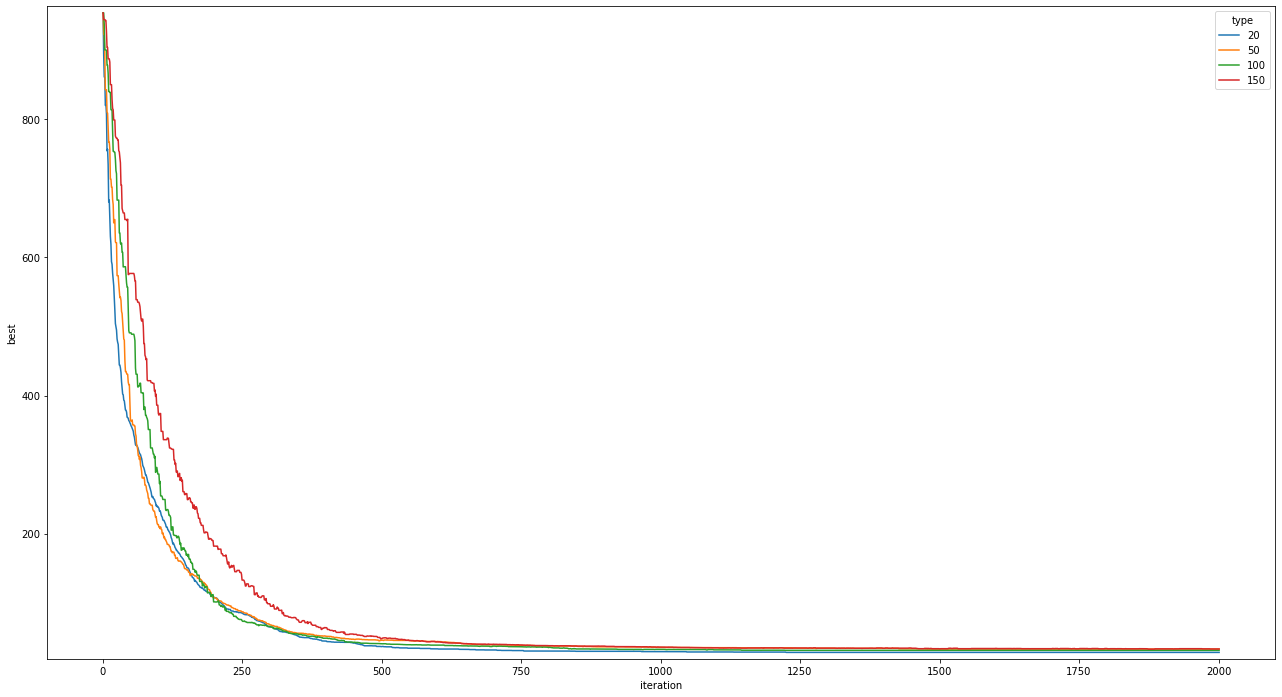

In [145]:
comparing_lineplots(dfs, names)

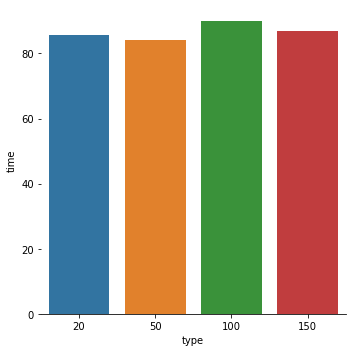

In [146]:
comparing_time(fns, names)